In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import exploring_script as es
import importlib
importlib.reload(es)
import matplotlib.pyplot as plt

In [3]:
confirmed_sso = es.load_data(["ssnamenr"])

In [4]:
len(confirmed_sso["ssnamenr"].unique())

517611

In [5]:
sso_name = confirmed_sso["ssnamenr"].unique()


In [6]:
mpc_ast_data = pd.read_parquet(
    "../data/MPC_Database/mpcorb_extended.parquet",
    columns=["Number", "Name", "Principal_desig", "Other_desigs", "a", "e", "i", "Node", "Peri", "M", "Epoch", "Orbit_type"]
)

mpc_comet_data = pd.read_parquet("../data/MPC_Database/cometels.parquet")

In [7]:
mpc_in_fink, fink_not_in_mpc = es.mpc_crossmatch(mpc_ast_data, pd.Series(confirmed_sso["ssnamenr"].unique()))

In [8]:
len(fink_not_in_mpc)

9115

In [35]:
len(mpc_in_fink) + len(fink_not_in_mpc), len(confirmed_sso["ssnamenr"].unique())

(513571, 517611)

## Eccentricity

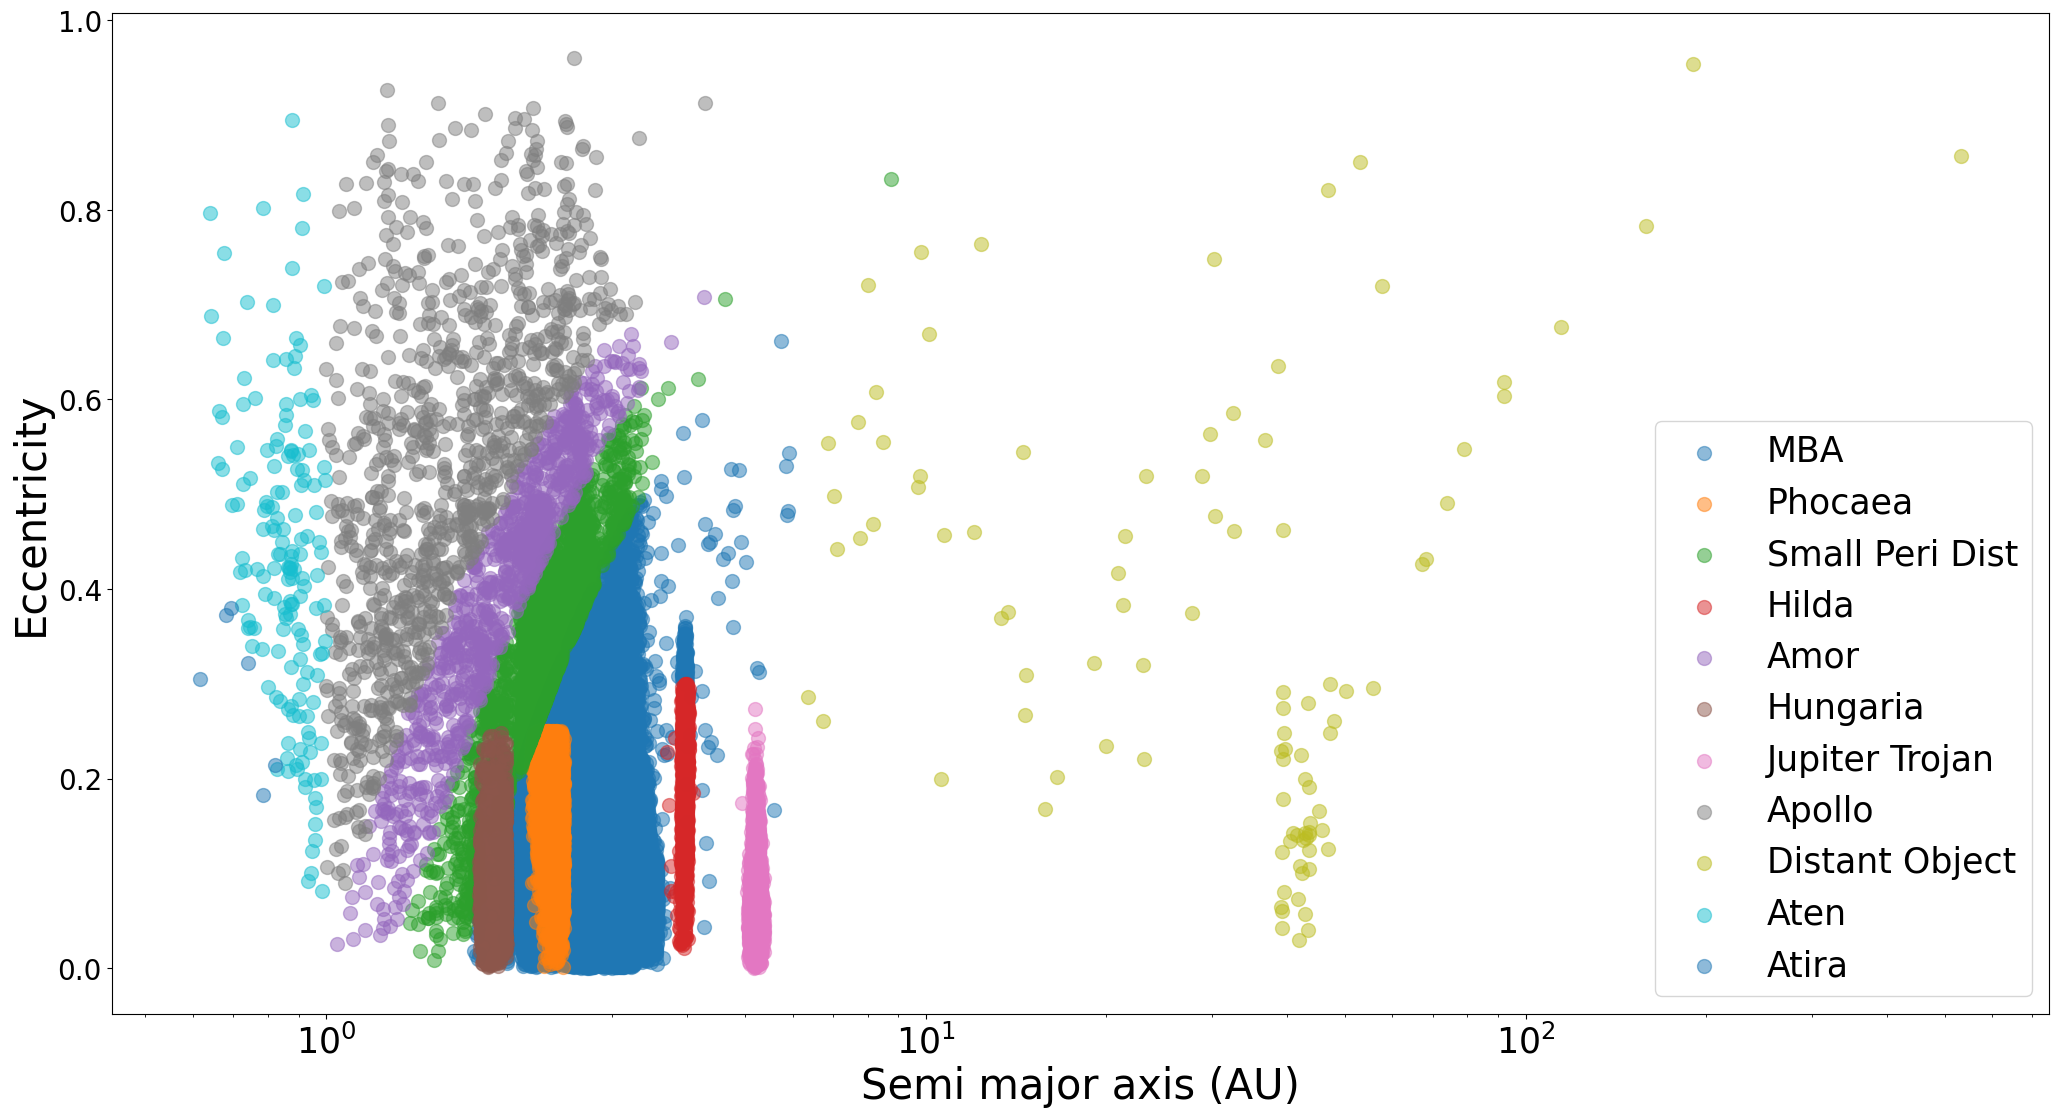

In [10]:
# MPC in Fink

es.plot_ast_distrib(mpc_in_fink, "e")

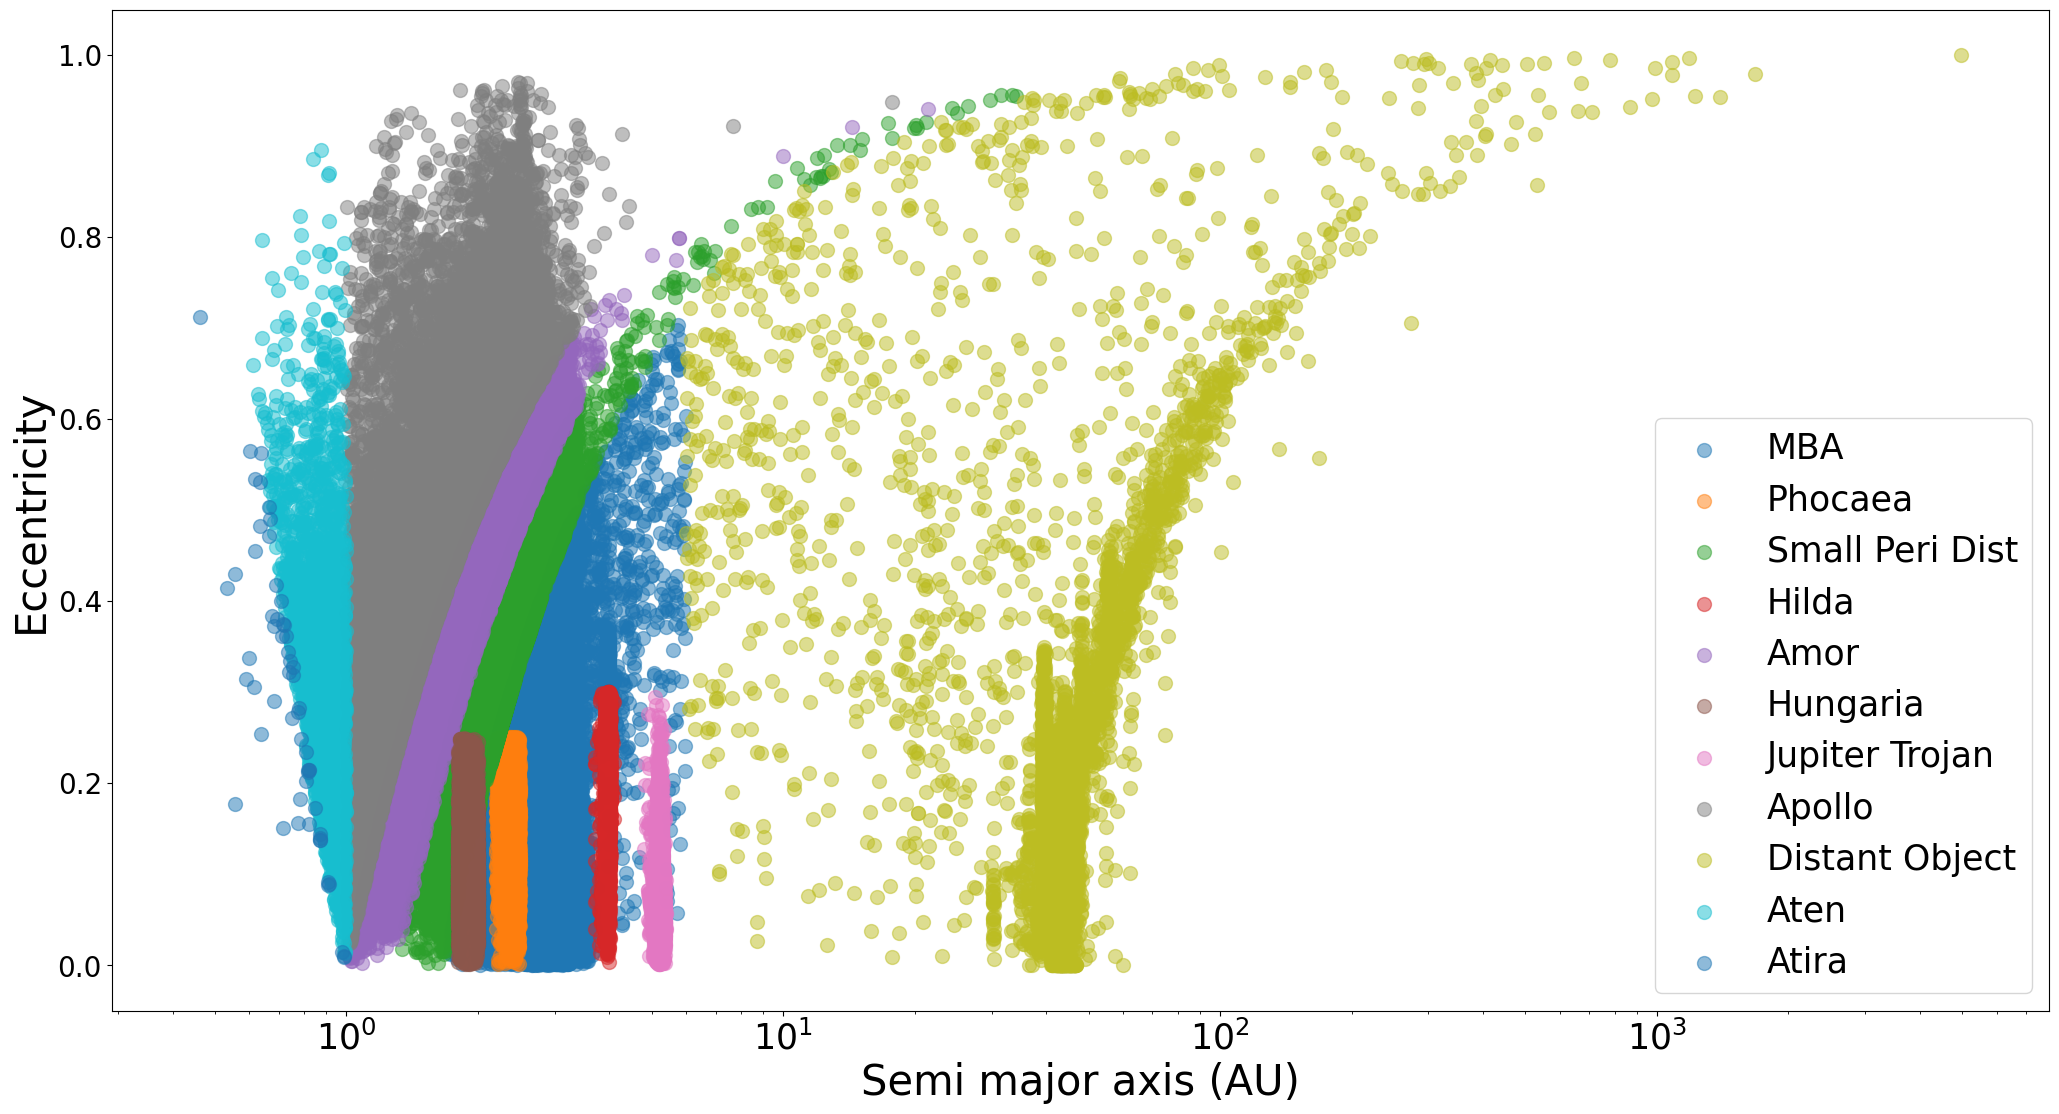

In [11]:
# All MPC

es.plot_ast_distrib(mpc_ast_data, "e")

## Inclination

/home/roman/anaconda3/envs/fink_fat_env/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


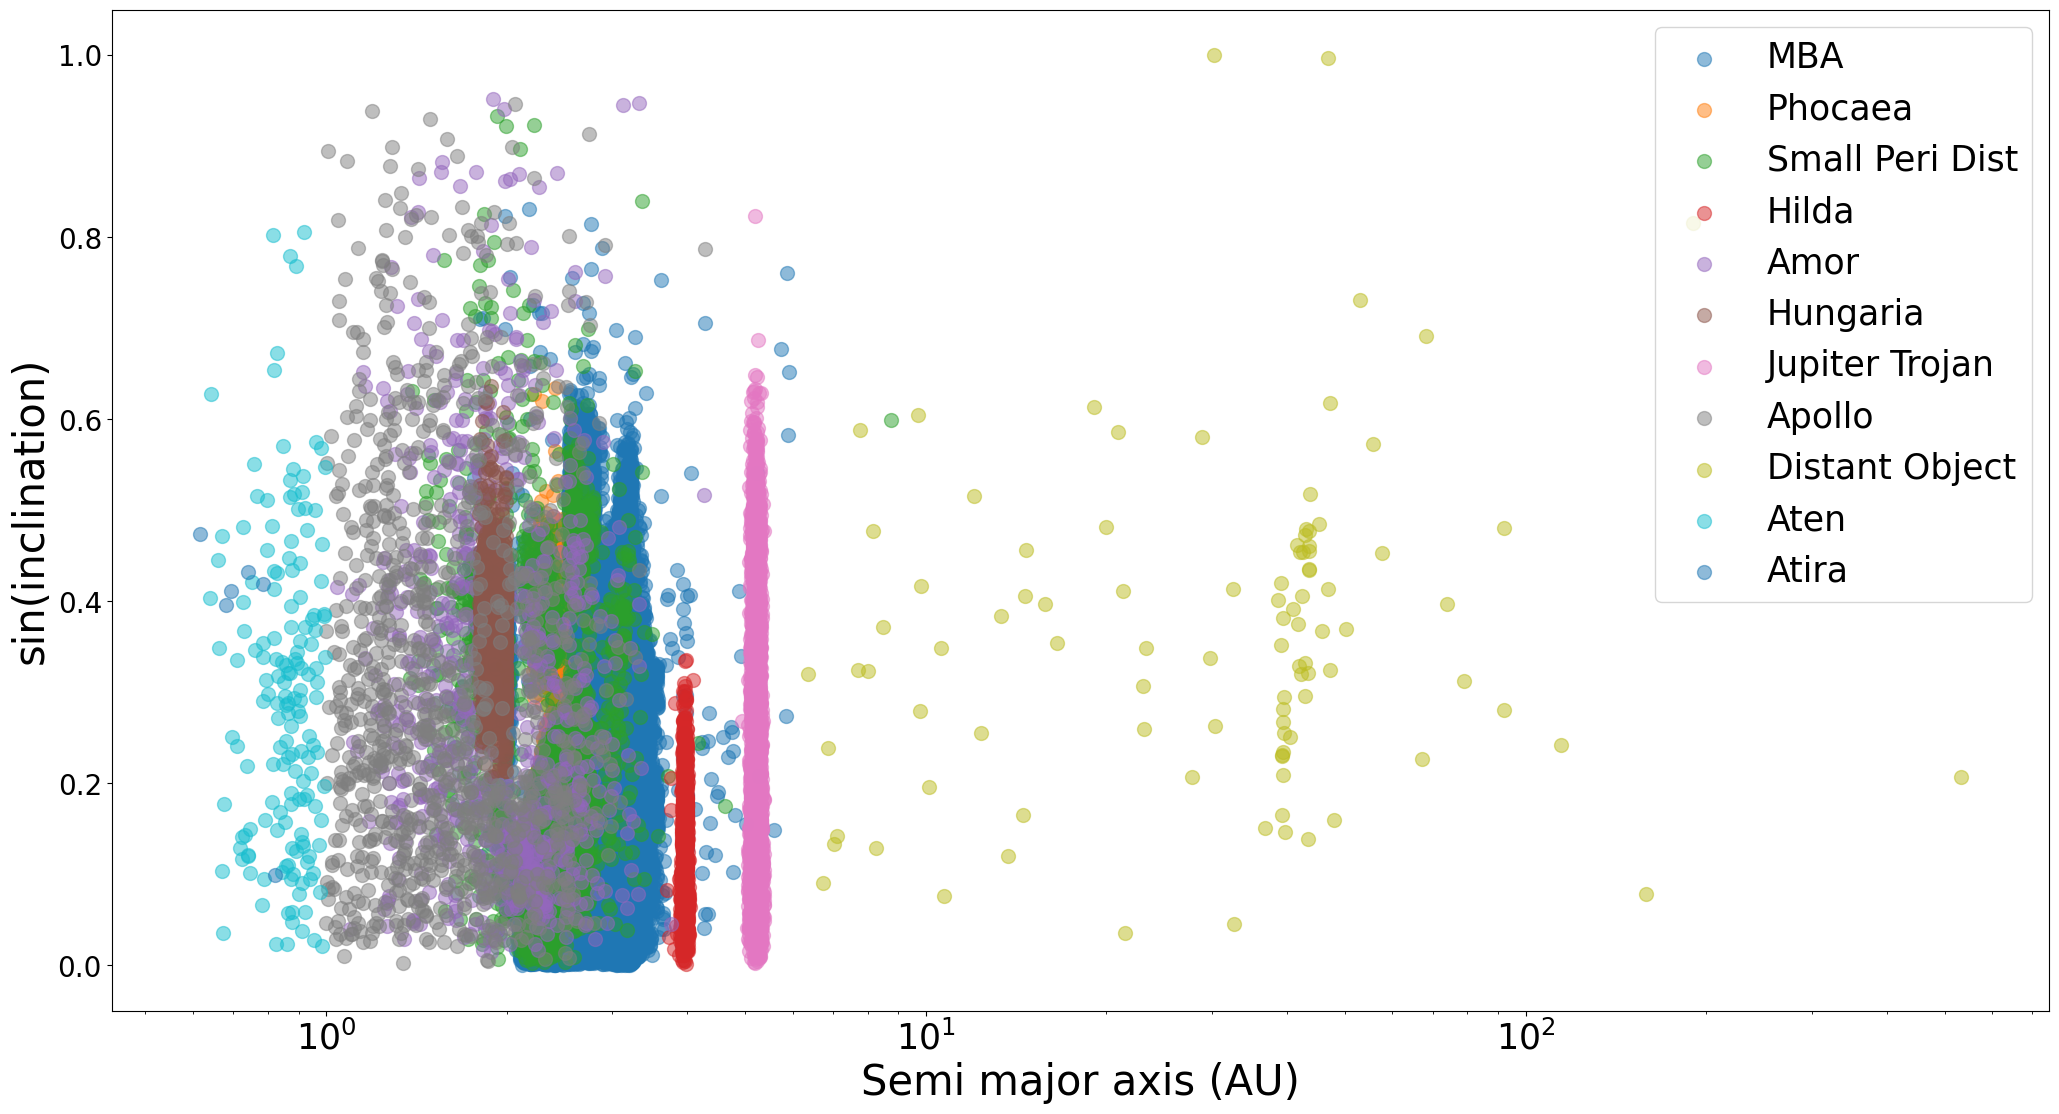

In [12]:
# MPC in Fink

es.plot_ast_distrib(mpc_in_fink, "i")

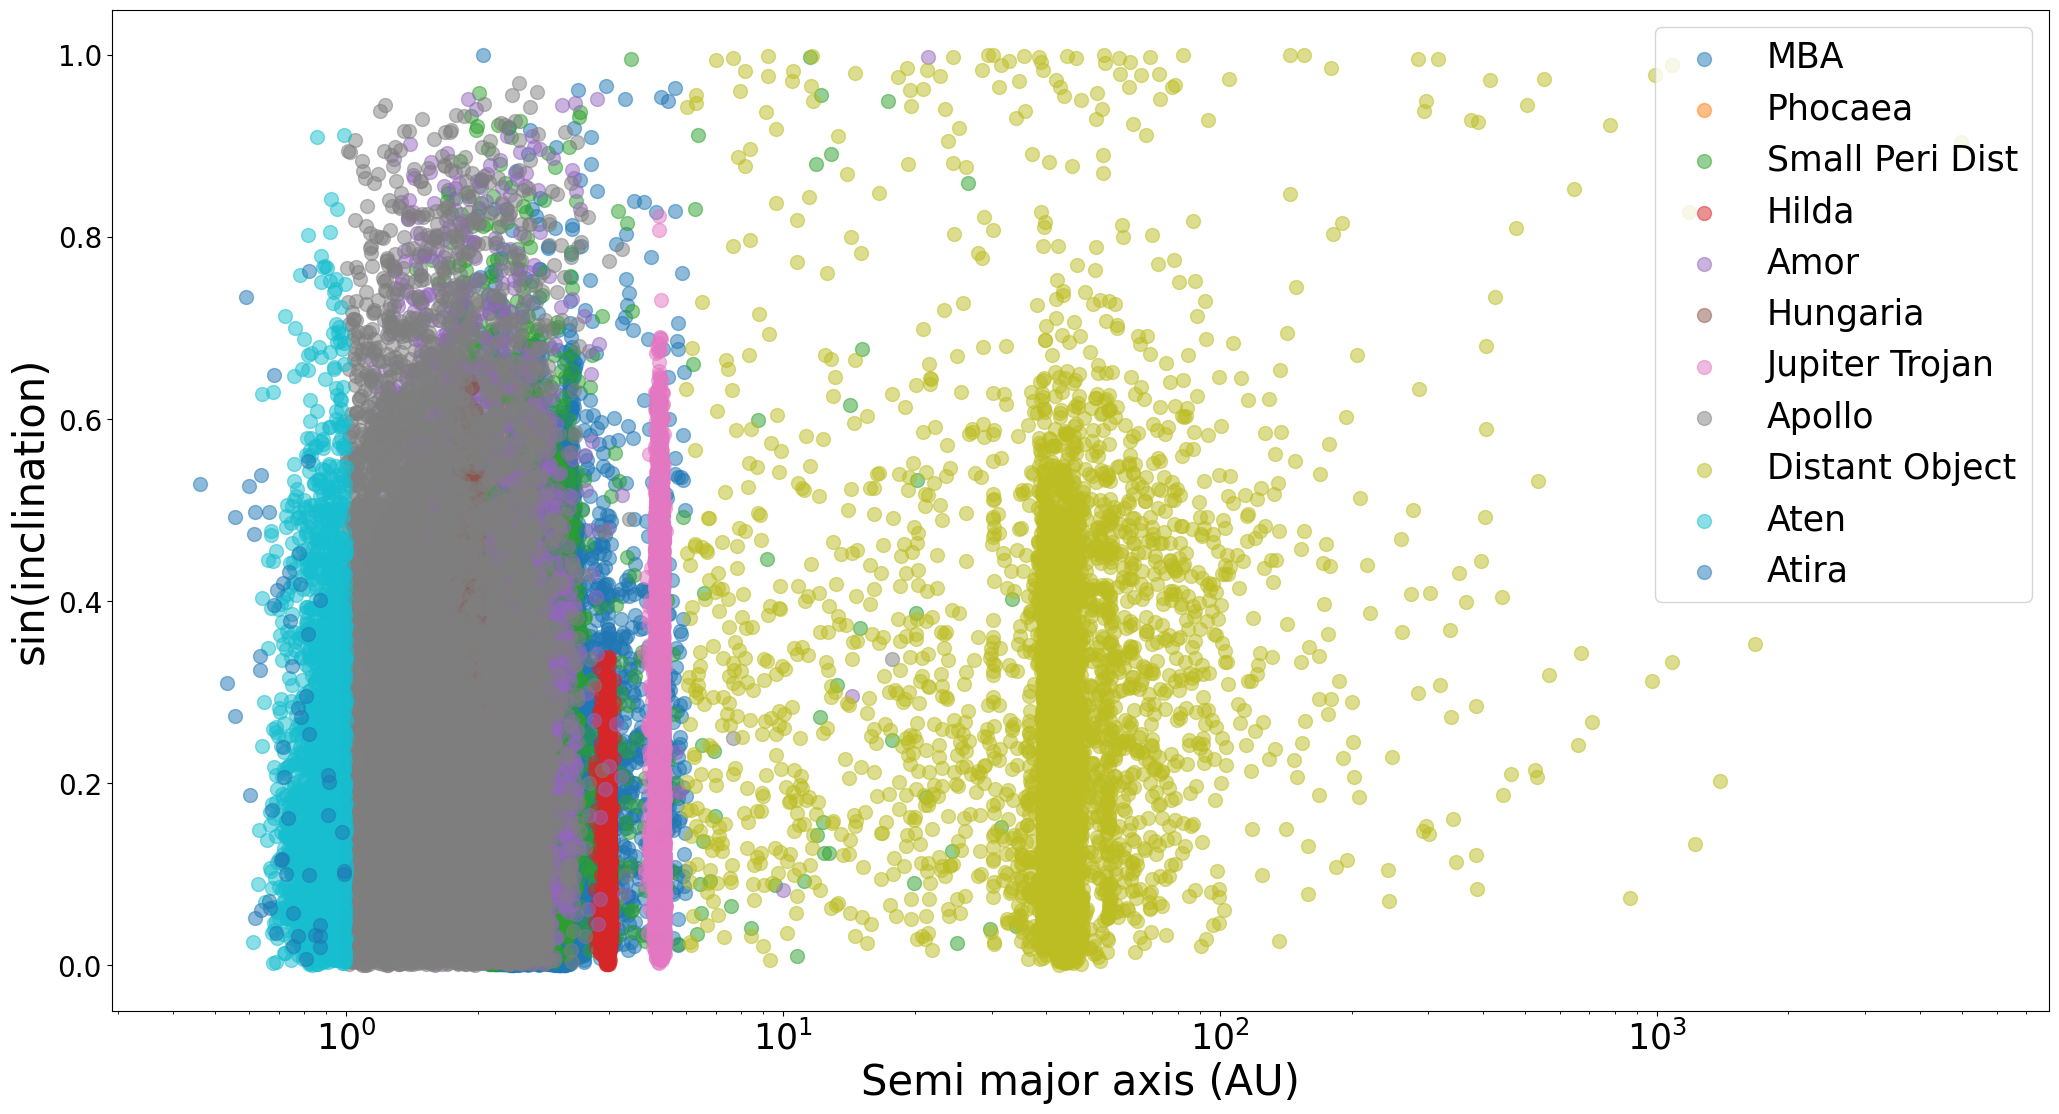

In [13]:
# All MPC

es.plot_ast_distrib(mpc_ast_data, "i")

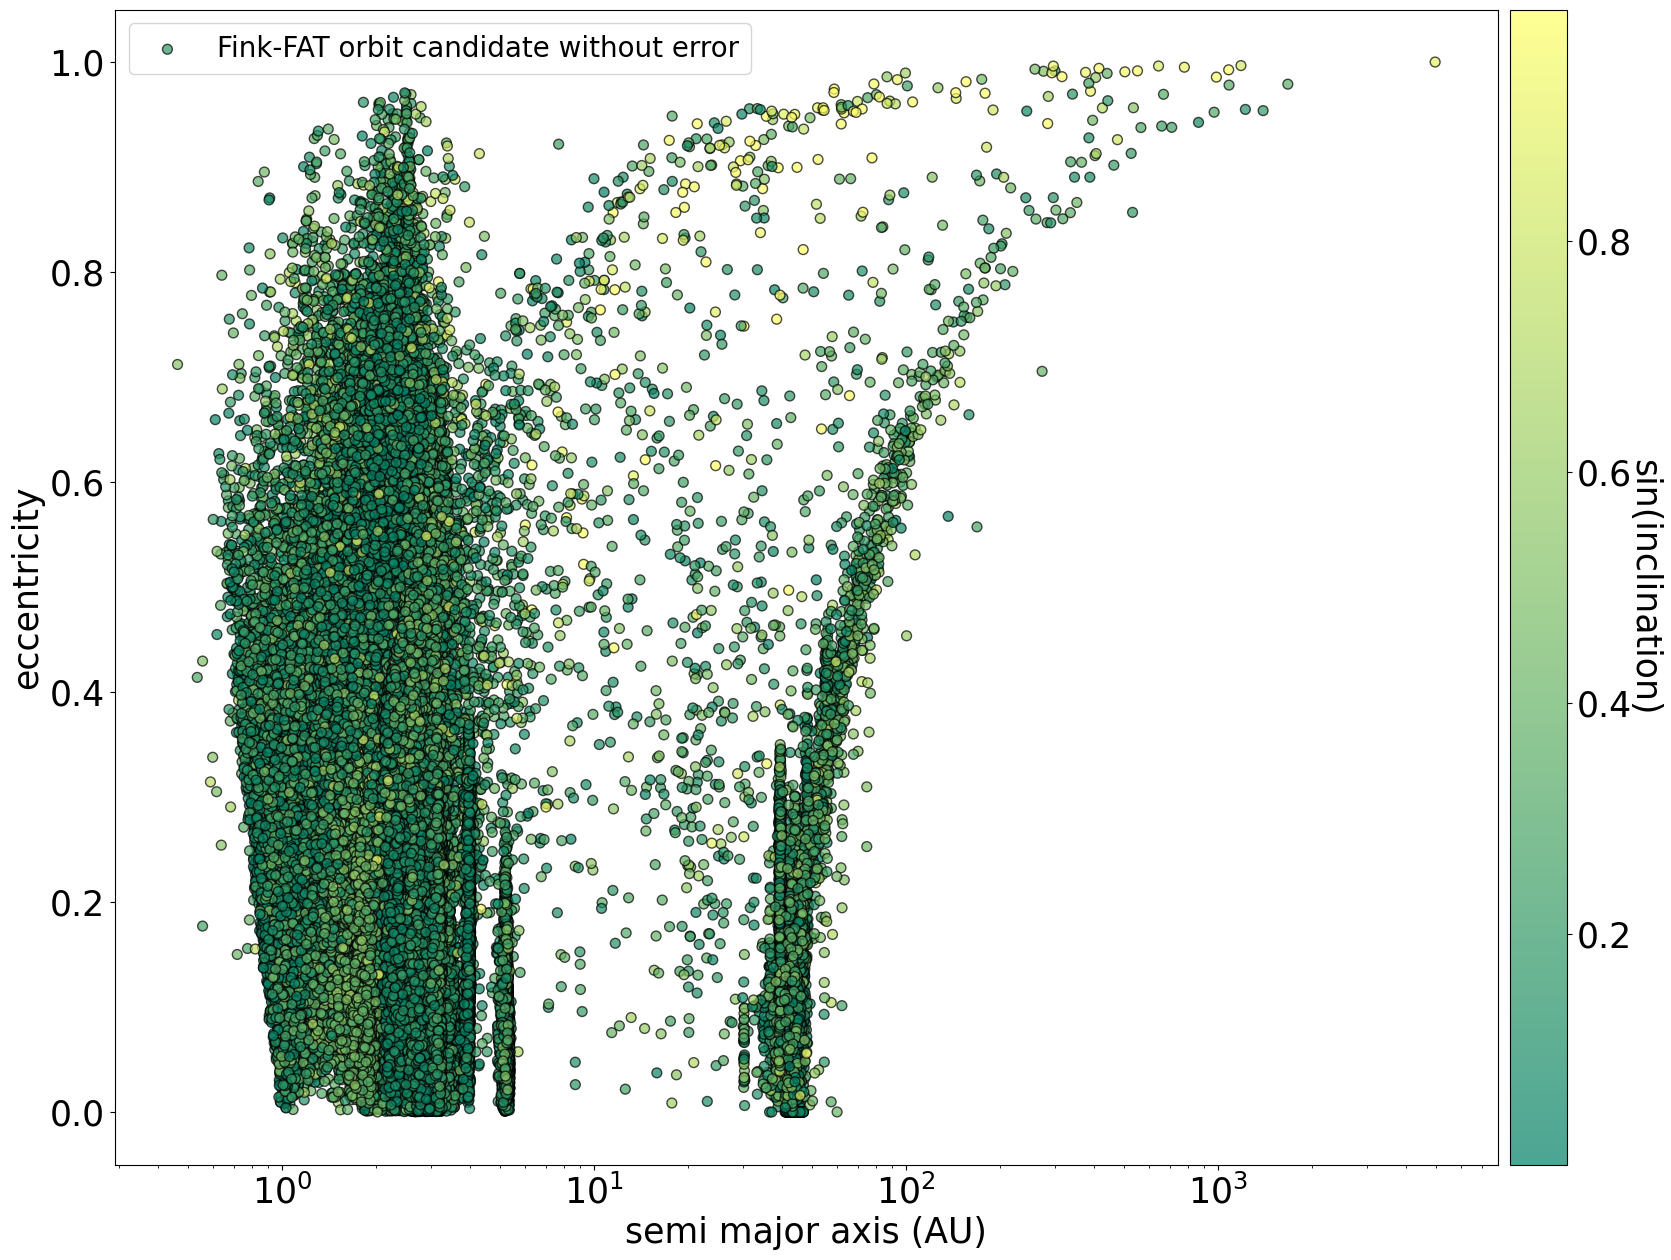

In [14]:
mpc_ast_data["d:sin_i"] = np.sin(np.deg2rad(mpc_ast_data["i"]))


# incl = mpc_ast_data["d:sin_i"]
# min_, max_ = incl.min(), incl.max()

fig = plt.figure(figsize=(30, 15))

cm = plt.cm.get_cmap('summer')

ax = plt.gca()
ax.set_xscale("log")

#sns.kdeplot(data=main_belt, x="a", y="e", thresh=0.5, alpha=0.6, cbar=False, ax=ax, label="MBA")
#sns.kdeplot(data=aten, x="a", y="e", thresh=0.5, alpha=0.6, cbar=False, ax=ax, label="Aten")

# plt.scatter(
#     mpc_in_fink["a"], 
#     mpc_in_fink["e"], 
#     c="#807f7c", 
#     s=30,
#     marker=".",
#     alpha=0.2, 
#     label="Fink confirmed orbit"
# )

# with_error = mpc_ast_data[mpc_ast_data["has_error"]]
# without_error = mpc_ast_data[~mpc_ast_data["has_error"]]

sc = plt.scatter(
    mpc_ast_data["a"], 
    mpc_ast_data["e"], 
    c=mpc_ast_data["d:sin_i"],
    edgecolors='black',
    s=50,
    cmap=cm,
    marker="o",
    label="Fink-FAT orbit candidate without error",
    alpha=0.7
)
# plt.clim(min_, max_)


# sc = plt.scatter(
#     with_error["a"], 
#     with_error["e"], 
#     c=with_error["d:sin_i"],
#     edgecolors='black',
#     marker="*",
#     s=350,
#     cmap=cm, 
#     label="Fink-FAT orbit candidate with error",
#     alpha=0.7
# )
# plt.clim(min_, max_)


cbar = sc.figure.colorbar(sc, fraction=0.4, pad=0.005)

cbar.set_label("sin(inclination)", rotation=270, fontsize=25, labelpad=21)
cbar.ax.tick_params(labelsize=25)

ax.tick_params(axis="x", which="major", labelsize=25)
ax.tick_params(axis="y", which="major", labelsize=25)
ax.set_xlabel("semi major axis (AU)", fontsize=25)
ax.set_ylabel("eccentricity", fontsize=25)

ax.legend(prop={"size": 20})
plt.show()

#### Test

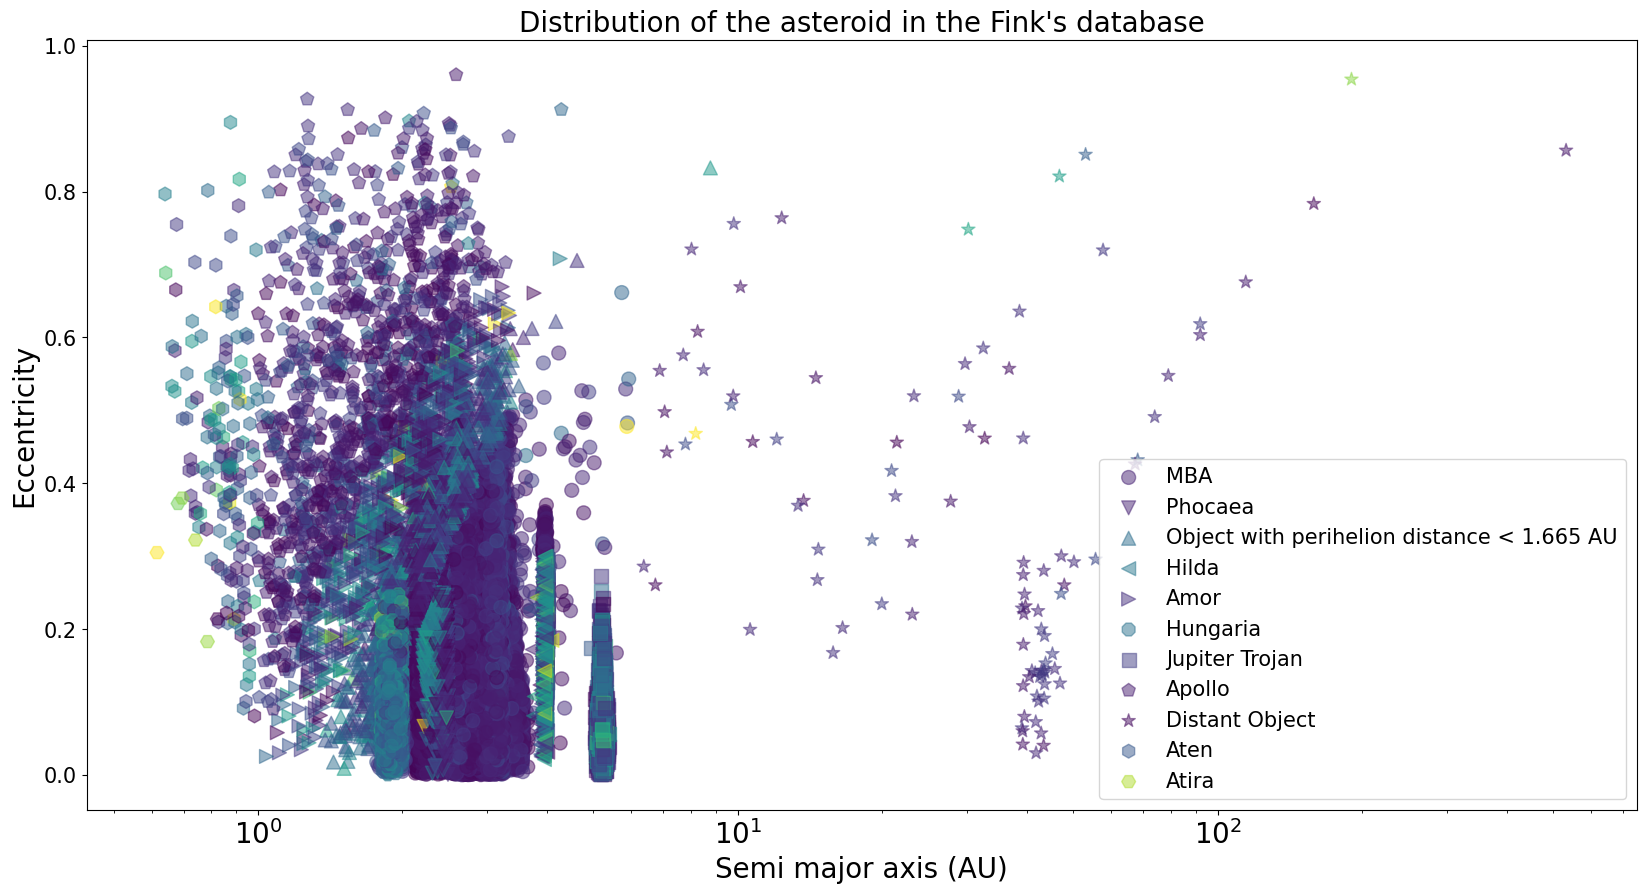

In [15]:
es.plot_ast_distrib_with_incl(mpc_in_fink)

### Using rocks

In [9]:
import rocks

In [10]:
rocks_fink = pd.read_parquet("data/rocks_fink.parquet")
bft_sso = pd.read_parquet(
    "../data/BFT_Miriade/ssoBFT-latest.parquet",
    columns=[
        "sso_name", "sso_class", 
        "orbital_elements.inclination.value",
        "orbital_elements.semi_major_axis.value",
        "orbital_elements.eccentricity.value"
        ]
)

In [11]:
bft_in_fink = bft_sso[bft_sso["sso_name"].isin(rocks_fink["ast_name"])]

In [12]:
len(confirmed_sso["ssnamenr"].unique()) - len(bft_in_fink)

13159

In [13]:
bft_in_fink["sso_class"].unique()

array(['MB>Middle', 'MB>Outer', 'MB>Inner', 'Mars-Crosser', 'MB>Cybele',
       'Hungaria', 'Trojan', 'NEA>Amor', 'MB>Hilda', 'Phocaea',
       'NEA>Apollo', 'KBO>Detached', 'KBO>Resonant>3:2', 'NEA>Aten',
       'Centaur', 'KBO>SDO', 'KBO>Classical>Main', 'NEA>Atira',
       'KBO>Resonant>7:4', 'KBO>Resonant>11:6', 'KBO>Resonant>5:3',
       'KBO>Resonant>5:2', 'KBO>Resonant>2:1', 'KBO>Classical>Inner',
       'KBO>Resonant>4:3', 'KBO>Resonant>7:3'], dtype=object)

In [14]:
bft_in_fink.columns

Index(['sso_name', 'sso_class', 'orbital_elements.inclination.value',
       'orbital_elements.semi_major_axis.value',
       'orbital_elements.eccentricity.value'],
      dtype='object')

In [26]:
bft_in_fink["sso_class"].unique()

array(['MB>Middle', 'MB>Outer', 'MB>Inner', 'Mars-Crosser', 'MB>Cybele',
       'Hungaria', 'Trojan', 'NEA>Amor', 'MB>Hilda', 'Phocaea',
       'NEA>Apollo', 'KBO>Detached', 'KBO>Resonant>3:2', 'NEA>Aten',
       'Centaur', 'KBO>SDO', 'KBO>Classical>Main', 'NEA>Atira',
       'KBO>Resonant>7:4', 'KBO>Resonant>11:6', 'KBO>Resonant>5:3',
       'KBO>Resonant>5:2', 'KBO>Resonant>2:1', 'KBO>Classical>Inner',
       'KBO>Resonant>4:3', 'KBO>Resonant>7:3'], dtype=object)

In [27]:
def get_label_merged(x):
        if x[0] in ["Hungaria", "MB", "Phocaea"]:
            return "MB"
        elif x[0] == "NEA":
            return "NEA"
        else:
            return x[0]
        

bft_in_fink["class_alt"] = bft_in_fink["sso_class"].str.split(">").map(lambda x: get_label_merged(x))
(bft_in_fink.groupby("class_alt").count()["sso_name"] / len(bft_in_fink)) * 100

/home/roman/anaconda3/envs/fink_fat_env/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


class_alt
Centaur          0.008722
KBO              0.011894
MB              97.532174
Mars-Crosser     1.249475
NEA              0.390523
Trojan           0.807213
Name: sso_name, dtype: float64

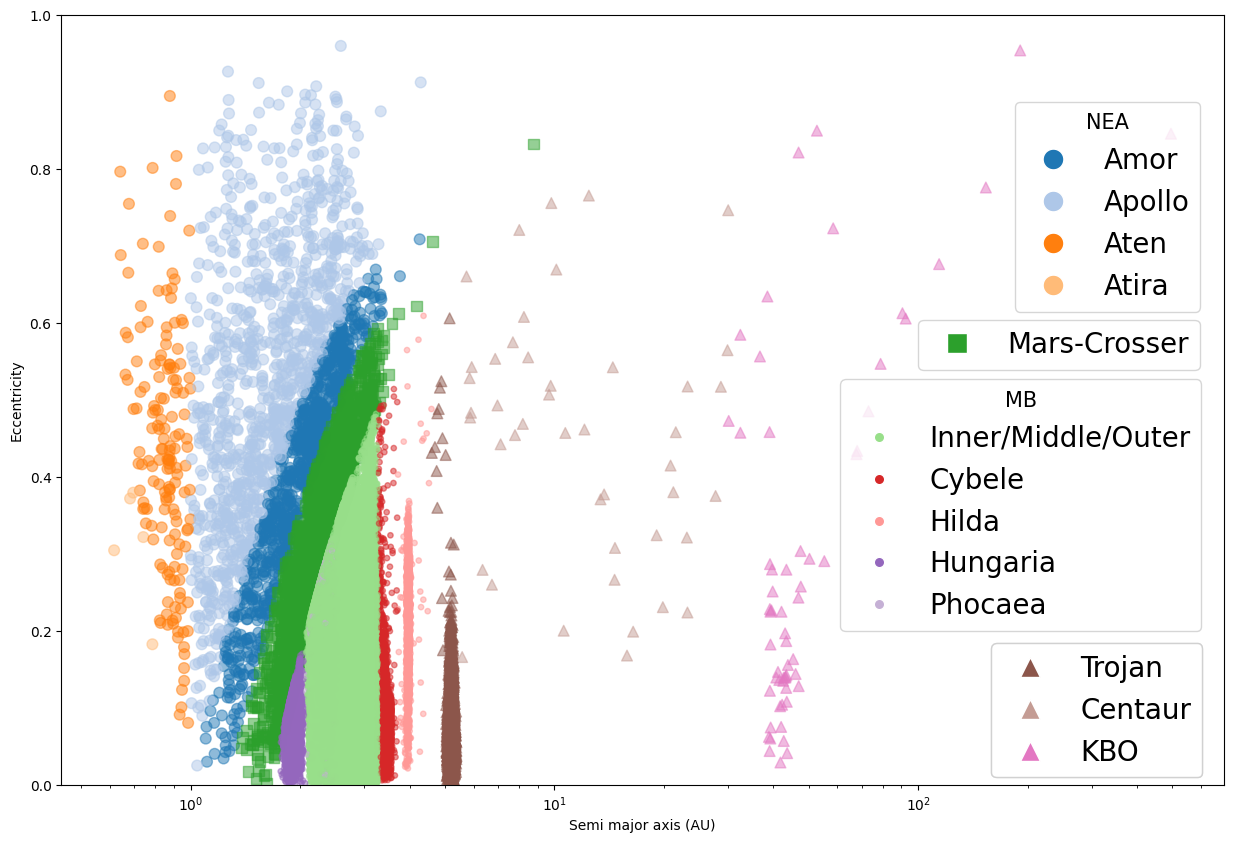

In [15]:
es.plot_ast_distrib_bft(bft_in_fink, "orbital_elements.eccentricity.value")

['MB', 'Middle']
['MB', 'Outer']
['MB', 'Inner']
['Mars-Crosser']
['MB', 'Cybele']
['Hungaria']
['Trojan']
['NEA', 'Amor']
['MB', 'Hilda']
['Phocaea']
['NEA', 'Apollo']
['KBO', 'Detached']
['KBO', 'Resonant', '3:2']
['NEA', 'Aten']
['Centaur']
['KBO', 'SDO']
['KBO', 'Classical', 'Main']
['NEA', 'Atira']
['KBO', 'Resonant', '7:4']
['KBO', 'Resonant', '11:6']
['KBO', 'Resonant', '5:3']
['KBO', 'Resonant', '5:2']
['KBO', 'Resonant', '2:1']
['KBO', 'Classical', 'Inner']
['KBO', 'Resonant', '4:3']
['KBO', 'Resonant', '7:3']


<Figure size 640x480 with 0 Axes>

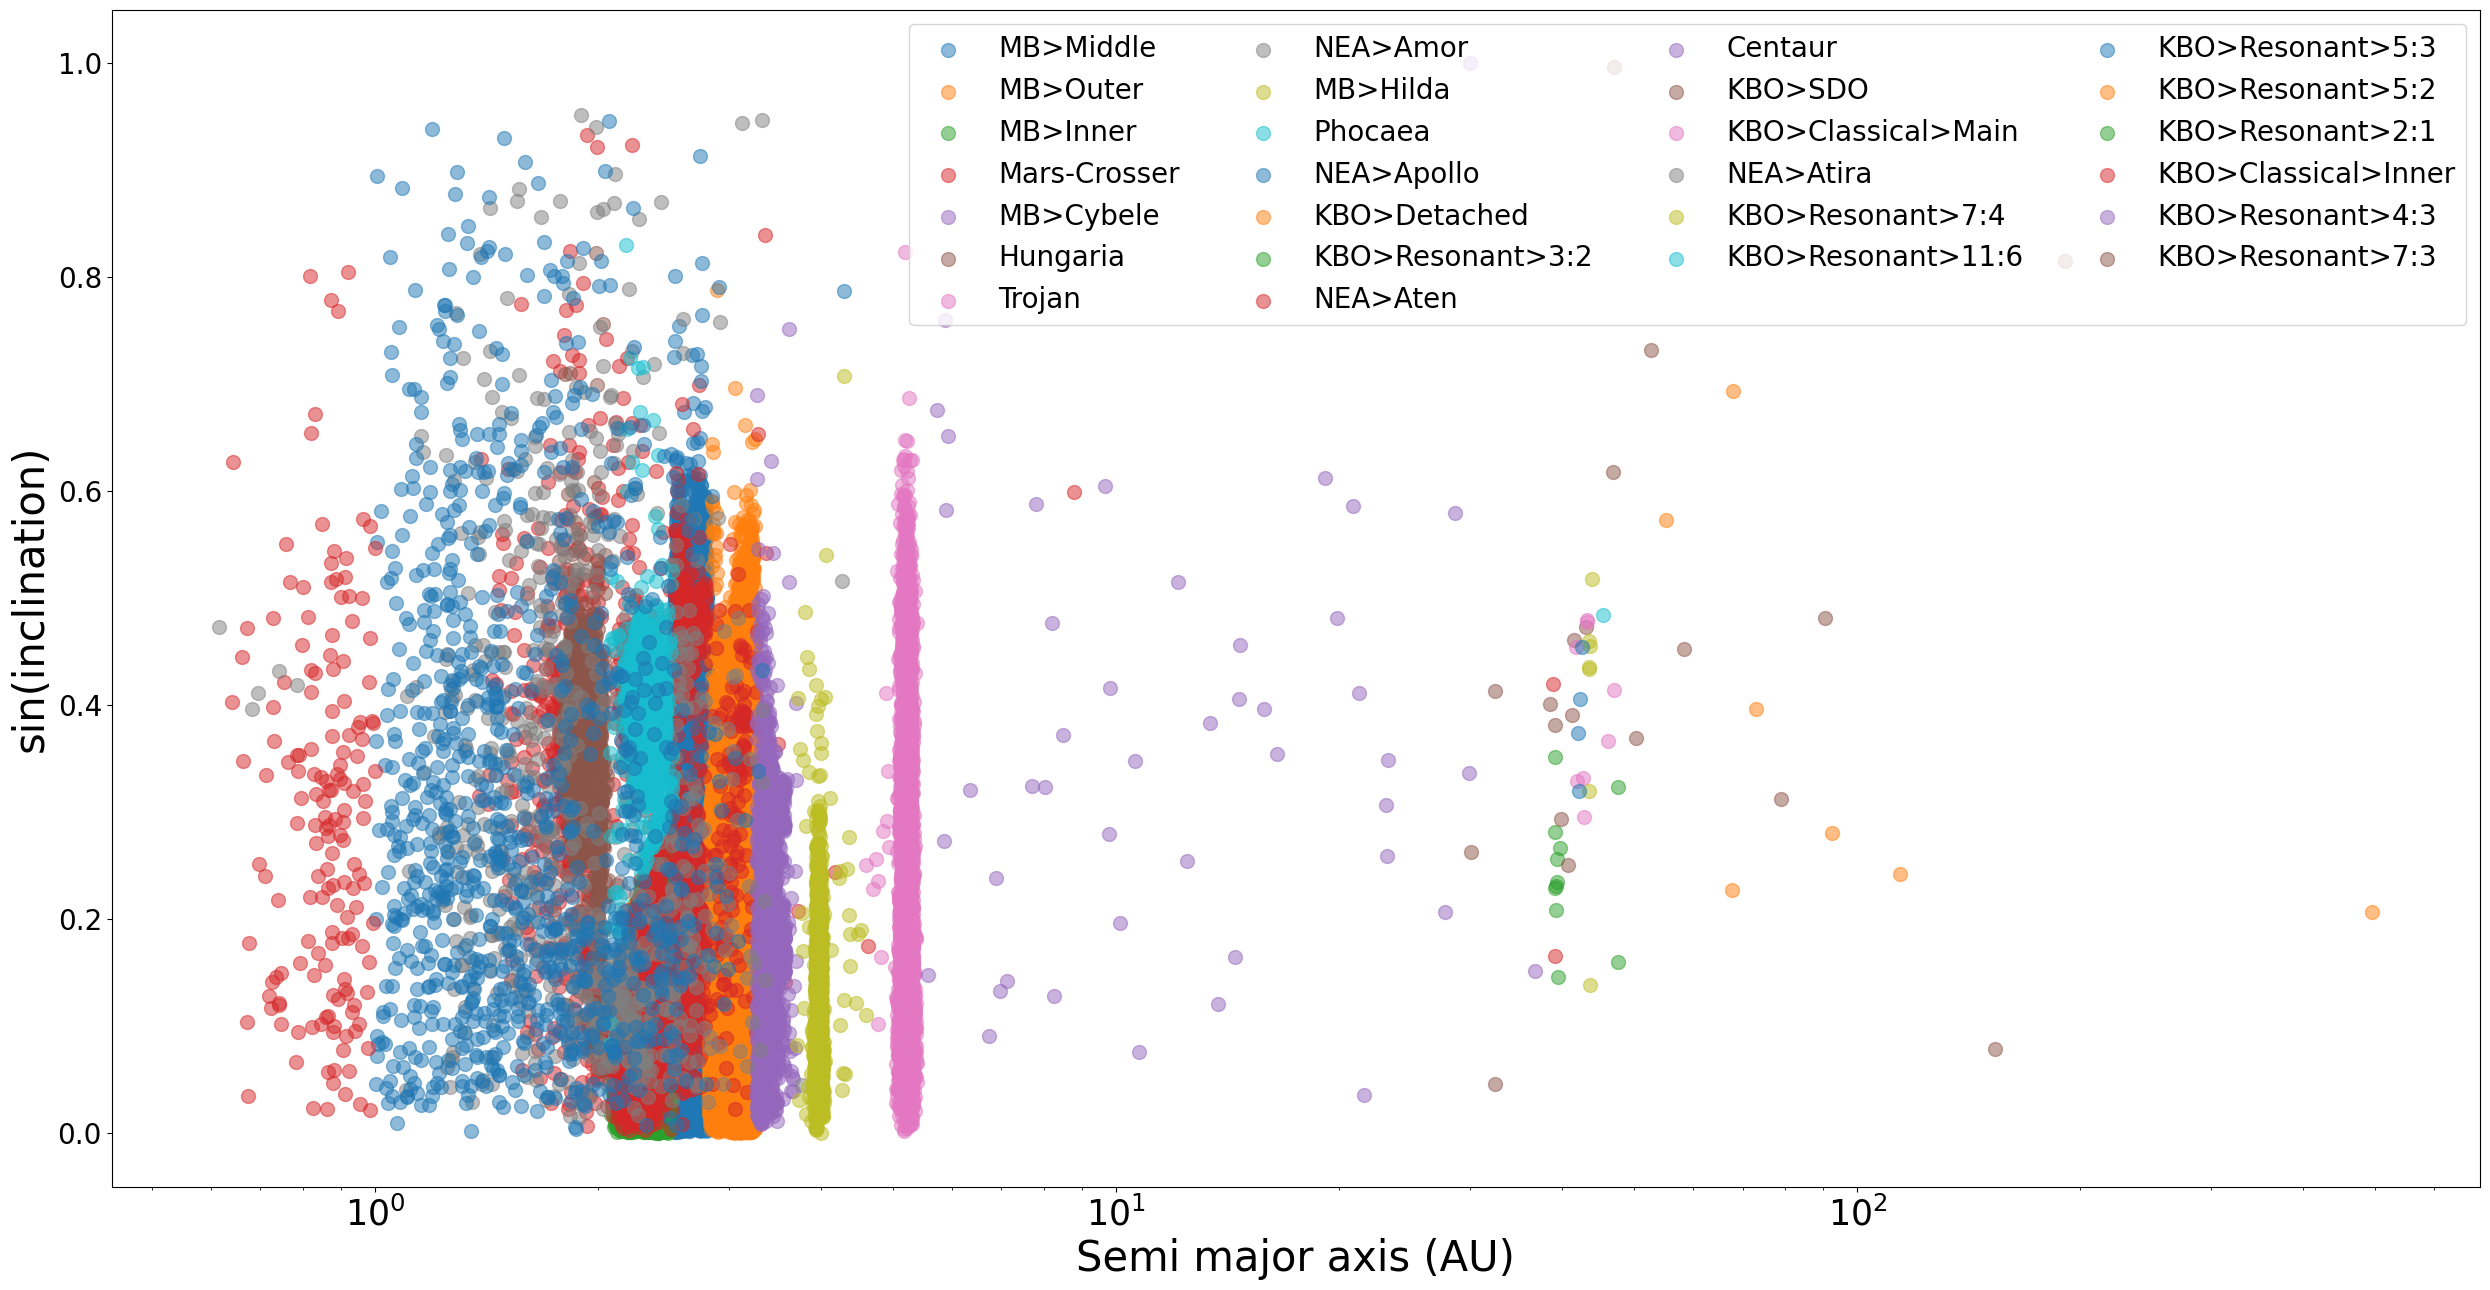

In [10]:
es.plot_ast_distrib_bft(bft_in_fink, "orbital_elements.inclination.value")